<a href="https://colab.research.google.com/github/preetamjumech/LLM/blob/main/SentenceSimilarity_UniversalSentenceEncoder_01_11_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow-hub

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from absl import logging

In [3]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)

print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [4]:
def embed(input):
    return model(input)

In [5]:
# Reduce logging output.
logging.set_verbosity(logging.ERROR)

In [6]:
word1 = "King"
word2 = "Man"
word3 = "Queen"
word4 = "Woman"

words = [word1, word2, word3, word4]

word_embeddings = embed(words)

word_embeddings

<tf.Tensor: shape=(4, 512), dtype=float32, numpy=
array([[-7.3004976e-02, -7.6539278e-02,  3.1626321e-02, ...,
        -3.1346723e-02,  3.8689345e-02, -5.1129248e-02],
       [-1.6678296e-02, -5.6039874e-02,  3.1642217e-02, ...,
        -6.9753587e-02,  1.7088944e-02,  1.1831756e-02],
       [-2.9229512e-02, -5.9425697e-02,  6.9158874e-02, ...,
         6.1887709e-05,  3.0601144e-02, -2.9583096e-03],
       [-4.9829155e-02, -1.4016484e-02,  1.8751666e-02, ...,
        -6.3101105e-02, -1.8634627e-02, -3.6357462e-02]], dtype=float32)>

In [7]:
for i, word_embedding in enumerate(np.array(word_embeddings).tolist()):

    print("Message: {}".format(words[i]))
    print("Embedding size: {}".format(len(word_embedding)))

    word_embedding_snippet = ", ".join(
      (str(x) for x in word_embedding[:3]))

    print("Embedding: [{}, ...]\n".format(word_embedding_snippet))

Message: King
Embedding size: 512
Embedding: [-0.07300497591495514, -0.07653927803039551, 0.031626321375370026, ...]

Message: Man
Embedding size: 512
Embedding: [-0.01667829602956772, -0.056039873510599136, 0.03164221718907356, ...]

Message: Queen
Embedding size: 512
Embedding: [-0.029229512438178062, -0.05942569673061371, 0.0691588744521141, ...]

Message: Woman
Embedding size: 512
Embedding: [-0.0498291552066803, -0.014016483910381794, 0.018751665949821472, ...]



In [8]:
word = "King"

sentence = "Word embedding or word vector is an approach with which we represent documents and words"

paragraph = (
    "Universal Sentence Encoder embeddings also support short paragraphs. "
    "The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks "
    "It is trained on a variety of data sources and a variety of tasks with the aim of dynamically accommodating a wide variety of natural language understanding tasks.")

messages = [word, sentence, paragraph]

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
    print("Message: {}".format(messages[i]))
    print("Embedding size: {}".format(len(message_embedding)))

    message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))

    print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: King
Embedding size: 512
Embedding: [-0.07300497591495514, -0.0765392929315567, 0.031626325100660324, ...]

Message: Word embedding or word vector is an approach with which we represent documents and words
Embedding size: 512
Embedding: [0.005533088929951191, -0.04749152064323425, 0.053227778524160385, ...]

Message: Universal Sentence Encoder embeddings also support short paragraphs. The Universal Sentence Encoder encodes text into high dimensional vectors that can be used for text classification, semantic similarity, clustering and other natural language tasks It is trained on a variety of data sources and a variety of tasks with the aim of dynamically accommodating a wide variety of natural language understanding tasks.
Embedding size: 512
Embedding: [-0.04472515359520912, -0.0687345564365387, 0.018275363370776176, ...]



In [9]:
def plot_similarity(labels, features):
    corr = np.inner(features, features)

    sns.set(font_scale = 1.2)

    g = sns.heatmap(
      corr,
      xticklabels = labels,
      yticklabels = labels,
      vmin = 0,
      vmax = 1,
      cmap = "YlGnBu"
    )

    g.set_xticklabels(labels, rotation = 90)
    g.set_title("Semantic Textual Similarity")

In [10]:
def run_and_plot(messages):
    message_embeddings = embed(messages)

    plot_similarity(messages, message_embeddings)

In [11]:
words = [
    "king", "queen", "apple", "orange", "potato", "onion",
    "spinach", "seattle", "new york", "supply", "money",
    "finance", "stocks", "goods", "coffee", "tea"
]

words

['king',
 'queen',
 'apple',
 'orange',
 'potato',
 'onion',
 'spinach',
 'seattle',
 'new york',
 'supply',
 'money',
 'finance',
 'stocks',
 'goods',
 'coffee',
 'tea']

In [12]:
import random

random.shuffle(words)

words

['orange',
 'goods',
 'queen',
 'stocks',
 'potato',
 'new york',
 'spinach',
 'money',
 'tea',
 'finance',
 'king',
 'seattle',
 'onion',
 'apple',
 'supply',
 'coffee']

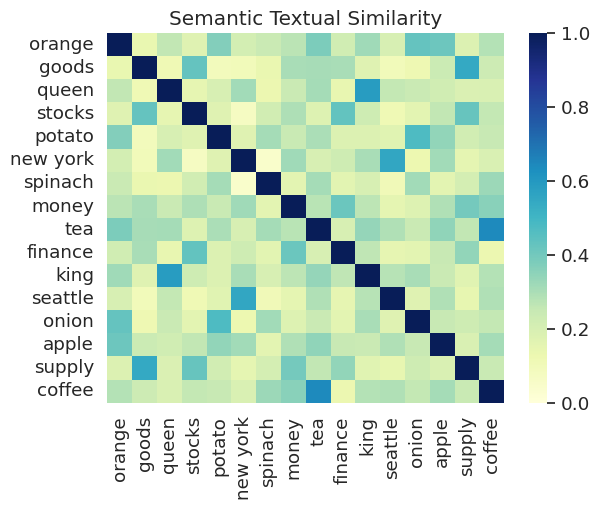

In [13]:
run_and_plot(words)

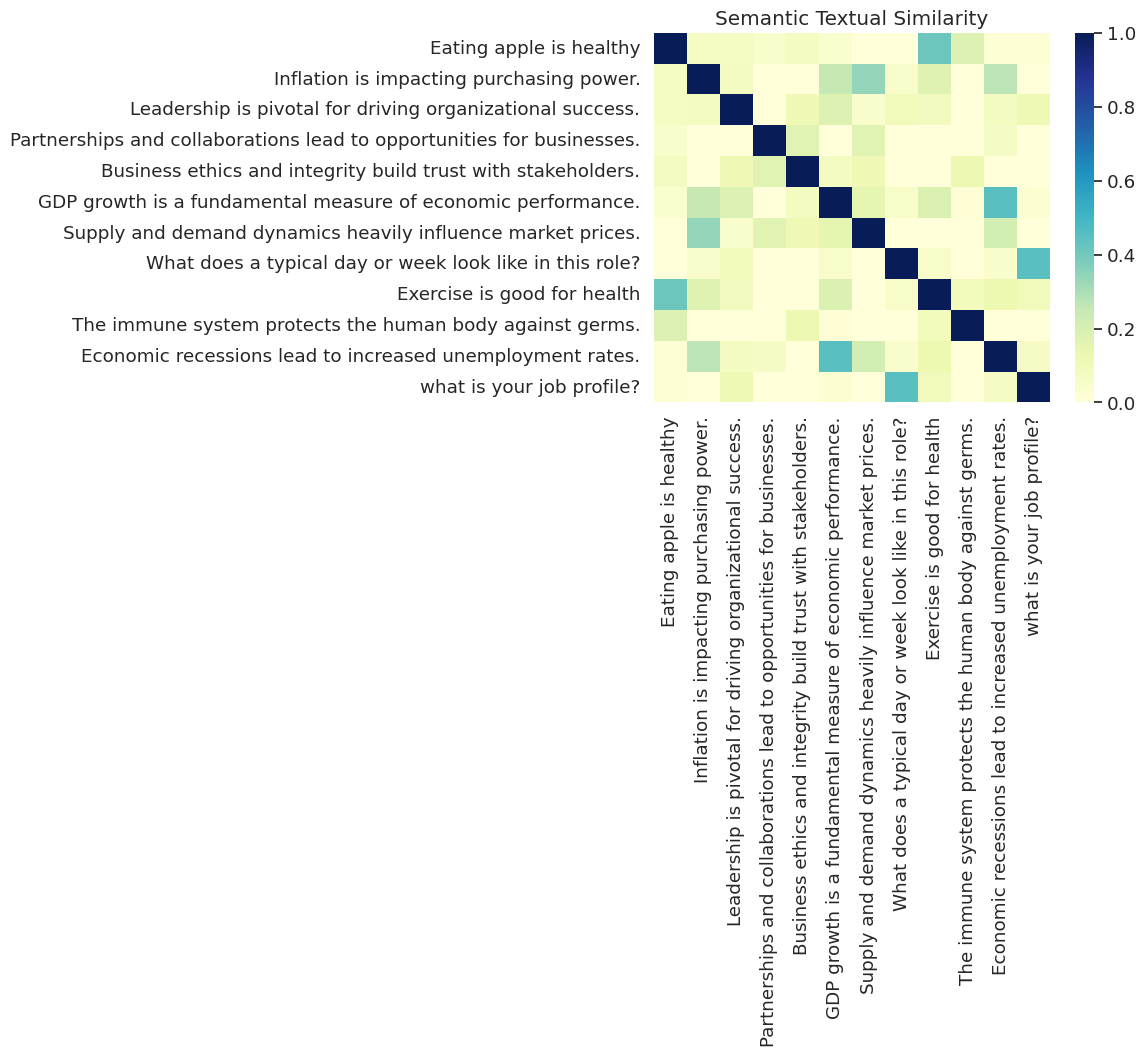

In [15]:
messages = [
    # Economics
    "Inflation is impacting purchasing power.",
    "Supply and demand dynamics heavily influence market prices.",
    "Economic recessions lead to increased unemployment rates.",
    "GDP growth is a fundamental measure of economic performance.",

    # Organisations
    "Leadership is pivotal for driving organizational success.",
    "Business ethics and integrity build trust with stakeholders.",
    "Partnerships and collaborations lead to opportunities for businesses.",

    # Food and health
    "The immune system protects the human body against germs.",
    "Eating apple is healthy",
    "Exercise is good for health",

    # Asking about Job
    "What does a typical day or week look like in this role?",
    "what is your job profile?",
]

random.shuffle(messages)
run_and_plot(messages)